In [224]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
data = pd.read_csv('default_of_credit_card_clients.csv')
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [226]:
data.shape

(30001, 25)

In [227]:
df_cleaned = data.iloc[1:].copy()
df_cleaned.columns = data.iloc[0]

In [228]:
df_cleaned.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


##### we can see that the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 for ease of understanding.

In [229]:
df_cleaned.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

In [230]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [231]:
df_cleaned.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [232]:
pd.set_option('display.max_columns', None)
df_cleaned.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [233]:
df_cleaned.drop(columns=["ID"], inplace=True)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors="coerce")
print("Null values:", df_cleaned.isnull().sum().sum())
print("Cleaned data shape:", df_cleaned.shape)

Null values: 0
Cleaned data shape: (30000, 24)


In [234]:
df_cleaned.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [235]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [236]:
df = df_cleaned.copy()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


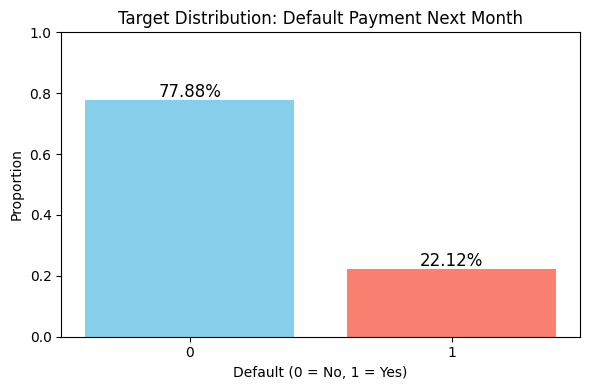

In [237]:
class_dist = df['default payment next month'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
plt.bar(class_dist.index.astype(str), class_dist.values, color=['skyblue', 'salmon'])
plt.title("Target Distribution: Default Payment Next Month")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
for i, val in enumerate(class_dist.values):
    plt.text(i, val + 0.01, f"{val:.2%}", ha='center', fontsize=12)

plt.ylim(0, 1)

plt.tight_layout()
plt.show()

##### LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
##### SEX: Gender (1 = male; 2 = female).
##### EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
##### MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
##### AGE: Age (year).
##### X6 - X11: History of past payment

##### target 1 = not pay, 0 = pay
##### class imbalance with 77.88 percent to not pay and 22.12% will pay

In [238]:
import re
pay_columns = [col for col in df_cleaned.columns if re.fullmatch(r"PAY_\d", col)]

for col in pay_columns:
    unique_vals = df_cleaned[col].unique()
    print(f"{col}: {sorted(unique_vals)}")

PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


##### -2 - no bill generated 
##### -1 - paid before due date
##### 0 - paid exactly on due date
##### 1 - 8 - shows delay 

In [239]:
df_cleaned['AGE'].nunique()

56

In [240]:
sorted_unique_ages = sorted(df_cleaned['AGE'].unique())
print(sorted_unique_ages)

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79]


In [241]:
pay_columns = [col for col in df_cleaned.columns if re.fullmatch(r"PAY_\d", col)]
df_cleaned["paid_months"] = (df_cleaned[pay_columns] <= 0).sum(axis=1)
df_cleaned["paid_ratio"] = df_cleaned["paid_months"] / len(pay_columns)

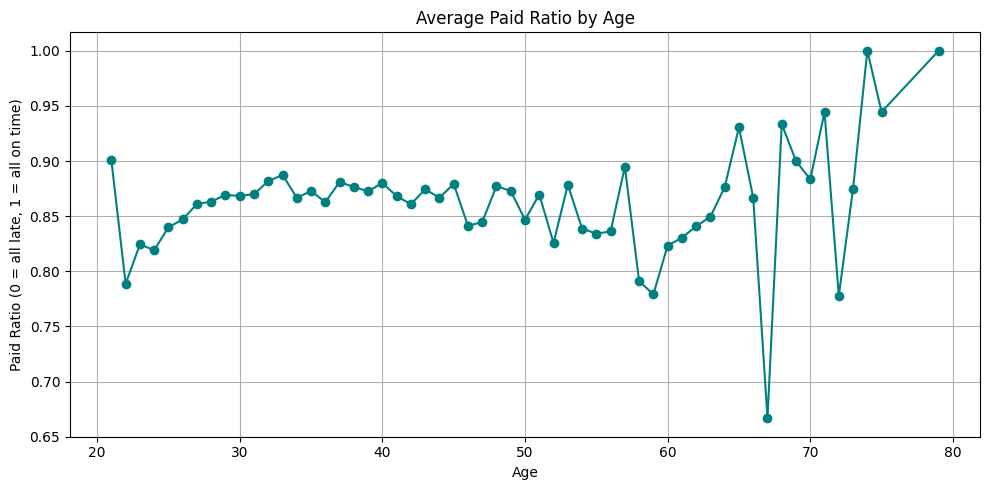

In [242]:
age_paid_ratio = df_cleaned.groupby("AGE")["paid_ratio"].mean()
plt.figure(figsize=(10, 5))
plt.plot(age_paid_ratio.index, age_paid_ratio.values, marker='o', color='teal')
plt.title("Average Paid Ratio by Age")
plt.xlabel("Age")
plt.ylabel("Paid Ratio (0 = all late, 1 = all on time)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Middle-aged customers (30–50) are the most consistently reliable.
##### Very young and very old age groups show more fluctuation.

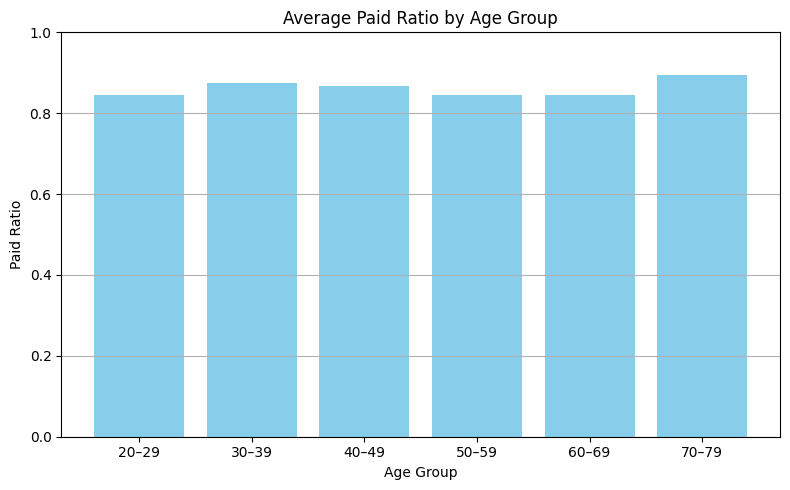

In [243]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20–29', '30–39', '40–49', '50–59', '60–69', '70–79']
df_cleaned['age_group'] = pd.cut(df_cleaned['AGE'], bins=bins, labels=labels, right=False)
grouped_paid_ratio = df_cleaned.groupby('age_group')['paid_ratio'].mean()


plt.figure(figsize=(8, 5))
plt.bar(grouped_paid_ratio.index, grouped_paid_ratio.values, color='skyblue')
plt.title("Average Paid Ratio by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Paid Ratio")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 30–49 age range are consistent.

##### Youngest customers (20–29) are the least consistent.

##### Elderly (70–79) seem highly reliable, but likely due to fewer people in this range.

In [244]:
age_group_counts = df_cleaned['age_group'].value_counts().sort_index()
age_group_counts


age_group
20–29     9618
30–39    11238
40–49     6464
50–59     2341
60–69      314
70–79       25
Name: count, dtype: int64


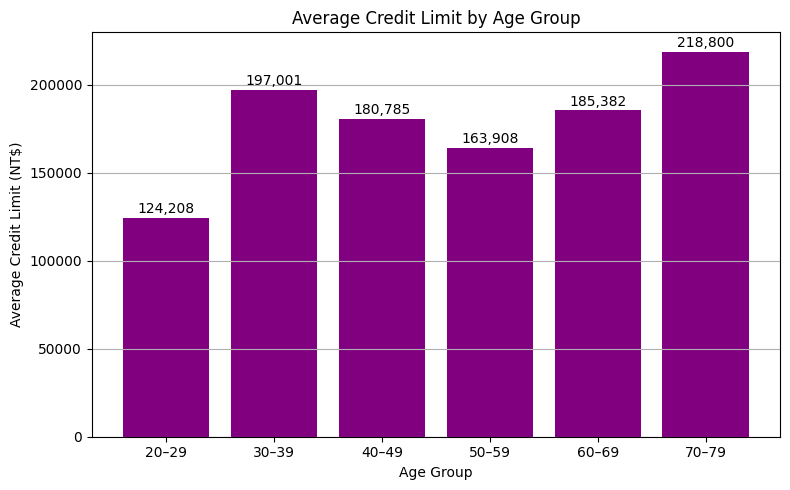

In [245]:
age_credit_limit = df_cleaned.groupby("age_group")["LIMIT_BAL"].mean()

plt.figure(figsize=(8, 5))
bars = plt.bar(age_credit_limit.index, age_credit_limit.values, color='purple')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f"{int(height):,}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.title("Average Credit Limit by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Credit Limit (NT$)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


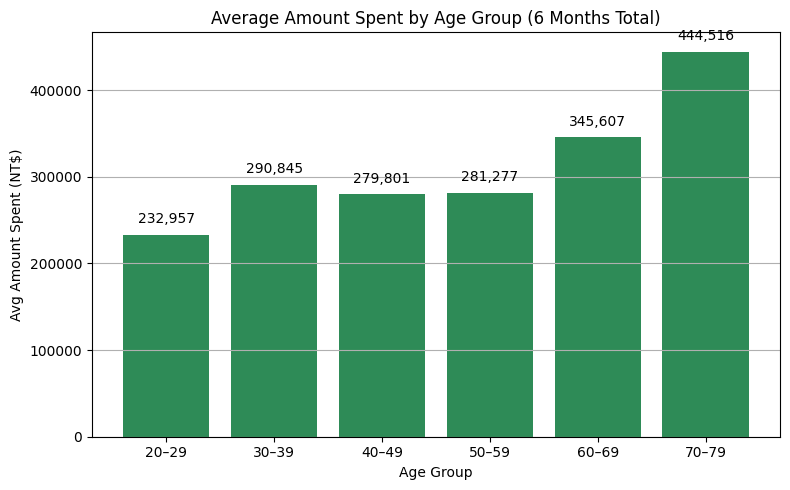

In [246]:
bill_cols = [f"BILL_AMT{i}" for i in range(1, 7)]
df_cleaned["total_spent"] = df_cleaned[bill_cols].sum(axis=1)
age_spending = df_cleaned.groupby("age_group")["total_spent"].mean()
plt.figure(figsize=(8, 5))
bars = plt.bar(age_spending.index, age_spending.values, color='seagreen')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10000, f"{int(height):,}", 
             ha='center', va='bottom', fontsize=10)

plt.title("Average Amount Spent by Age Group (6 Months Total)")
plt.xlabel("Age Group")
plt.ylabel("Avg Amount Spent (NT$)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

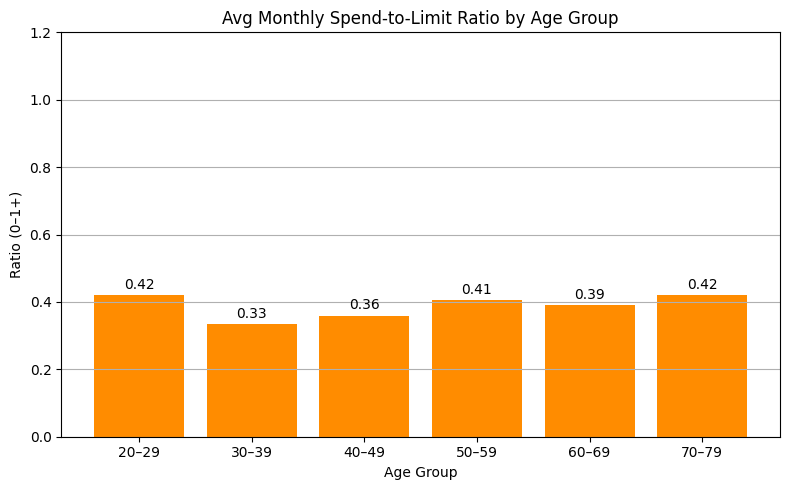

In [247]:
bill_cols = [f"BILL_AMT{i}" for i in range(1, 7)]
df_cleaned["avg_monthly_bill"] = df_cleaned[bill_cols].mean(axis=1)
df_cleaned["spend_limit_ratio"] = df_cleaned["avg_monthly_bill"] / df_cleaned["LIMIT_BAL"]
age_spend_ratio = df_cleaned.groupby("age_group")["spend_limit_ratio"].mean()

plt.figure(figsize=(8, 5))
bars = plt.bar(age_spend_ratio.index, age_spend_ratio.values, color='darkorange')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", 
             ha='center', va='bottom', fontsize=10)

plt.title("Avg Monthly Spend-to-Limit Ratio by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Ratio (0–1+)")
plt.ylim(0, 1.2)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 30–49 use their credit most conservatively — only ~33–36% of their limit.
##### Young (20–29) and old (70–79) customers use over 40% — possibly due to: Lower limits(for 20–29) and Higher dependency on credit

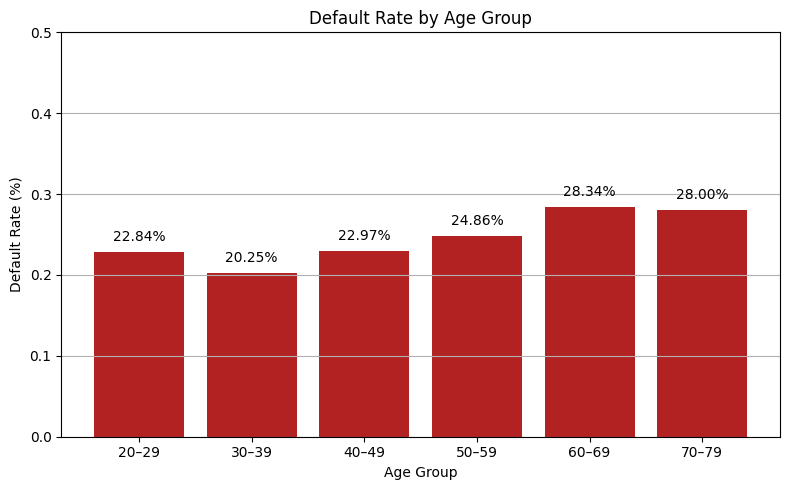

In [248]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20–29', '30–39', '40–49', '50–59', '60–69', '70–79']
df_cleaned['age_group'] = pd.cut(df_cleaned['AGE'], bins=bins, labels=labels, right=False)
age_group_default = df_cleaned.groupby("age_group")["default payment next month"].mean()

plt.figure(figsize=(8, 5))
bars = plt.bar(age_group_default.index, age_group_default.values, color='firebrick')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2%}",
             ha='center', va='bottom', fontsize=10)

plt.title("Default Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Default Rate (%)")
plt.ylim(0, 0.5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


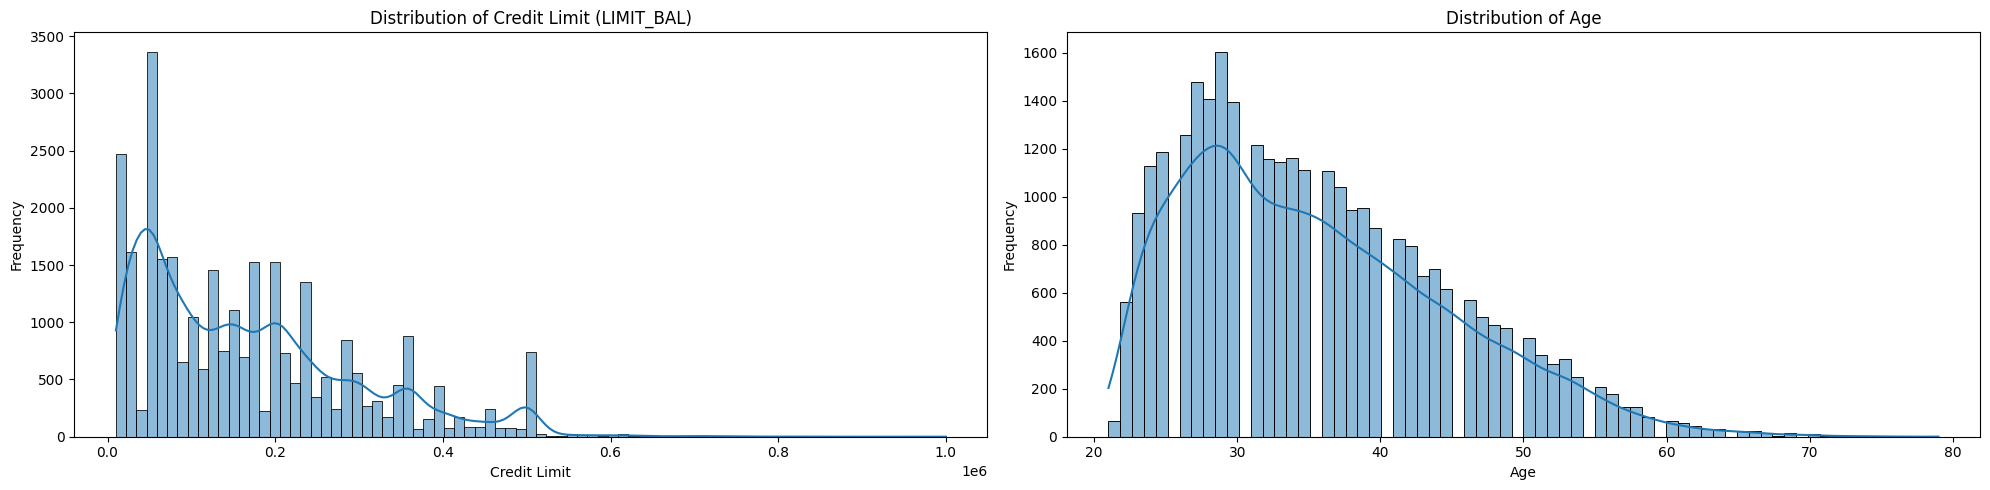

In [249]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['LIMIT_BAL'], kde=True)
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")

#Age
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['AGE'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

##### We have more number of clients having limiting balance between 0 to 200000 currency.
##### We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.

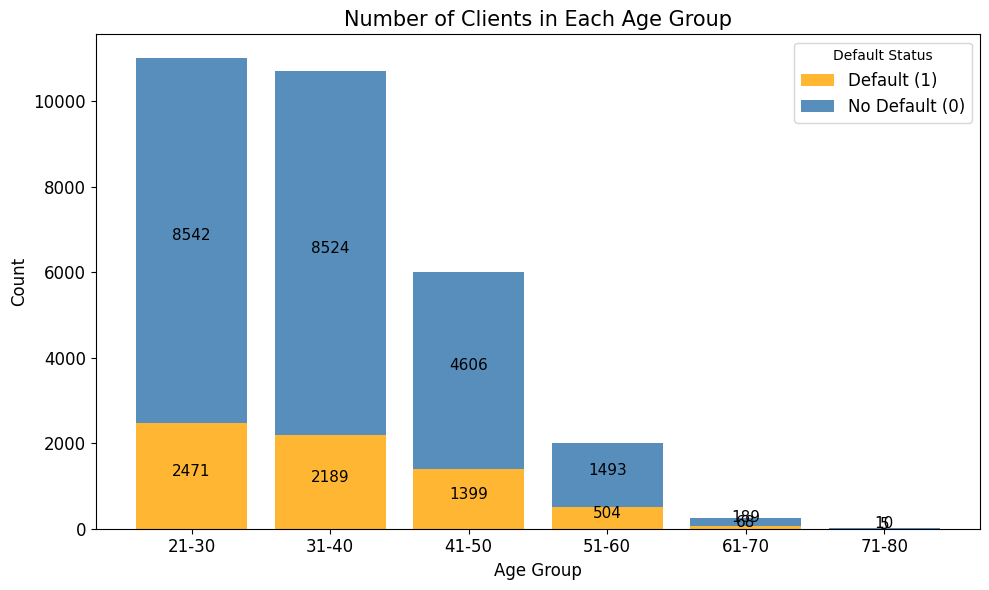

In [250]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df_cleaned['AGE_BIN'] = pd.cut(df_cleaned['AGE'], bins=bins, labels=labels, right=True)
age_1 = df_cleaned[df_cleaned['default payment next month'] == 1]['AGE_BIN'].value_counts().sort_index()
age_0 = df_cleaned[df_cleaned['default payment next month'] == 0]['AGE_BIN'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(age_1.index, age_1.values, label='Default (1)', color='orange', alpha=0.8)
plt.bar(age_0.index, age_0.values, bottom=age_1.values, label='No Default (0)', color='steelblue', alpha=0.9)
for x, y in zip(age_1.index, age_1.values):
    plt.text(x, y / 2, str(y), ha='center', fontsize=11)
for x, y1, y0 in zip(age_0.index, age_1.values, age_0.values):
    plt.text(x, y1 + y0 / 2, str(y0), ha='center', fontsize=11)

plt.title("Number of Clients in Each Age Group", fontsize=15)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Default Status", fontsize=12)
plt.tight_layout()
plt.show()


###### We have maximum clients from 21-30 age group followed by 31-40.
###### with increasing age group the number of clients that will default the payment next month is decreasing. 
###### Hence we can see that Age is important feature to predict the default payment for next month.

In [251]:
df_cleaned['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [252]:
invalid_marriage_count = (df_cleaned["MARRIAGE"] == 0).sum()
print(f"Number of rows with MARRIAGE = 0: {invalid_marriage_count}")

Number of rows with MARRIAGE = 0: 54


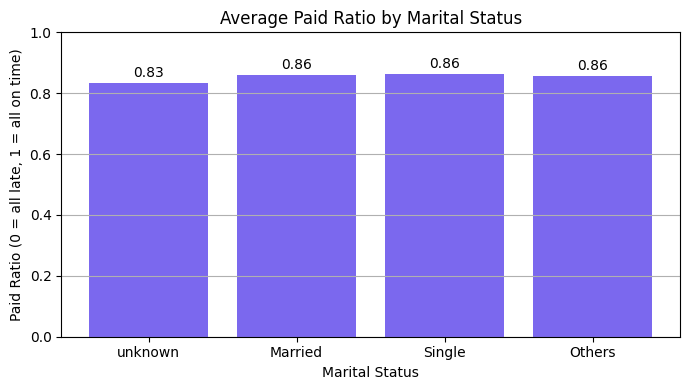

In [253]:
marriage_labels = {1: "Married", 2: "Single", 3: "Others", 0:"unknown"}
marriage_paid_ratio = df_cleaned.groupby("MARRIAGE")["paid_ratio"].mean()
marriage_paid_ratio.index = marriage_paid_ratio.index.map(marriage_labels)

plt.figure(figsize=(7, 4))
bars = plt.bar(marriage_paid_ratio.index, marriage_paid_ratio.values, color='mediumslateblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", 
             ha='center', va='bottom', fontsize=10)

plt.title("Average Paid Ratio by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Paid Ratio (0 = all late, 1 = all on time)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### the value 0 is not defined in description

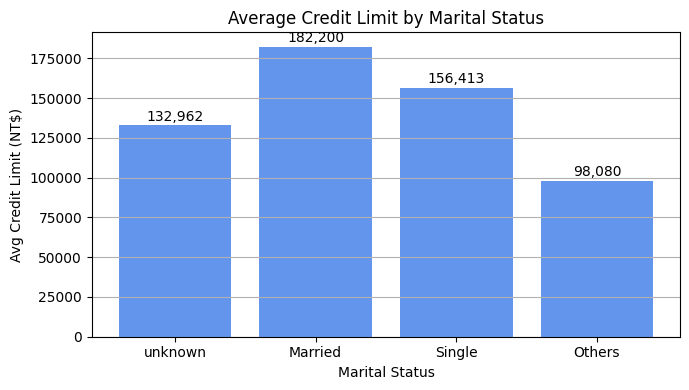

In [254]:
marriage_limit = df_cleaned.groupby("MARRIAGE")["LIMIT_BAL"].mean()
marriage_limit.index = marriage_limit.index.map(lambda x: marriage_labels.get(int(x), "Unknown"))

plt.figure(figsize=(7, 4))
bars = plt.bar(marriage_limit.index, marriage_limit.values, color='cornflowerblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f"{int(height):,}",
             ha='center', va='bottom', fontsize=10)

plt.title("Average Credit Limit by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Avg Credit Limit (NT$)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [255]:
df_cleaned

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,paid_months,paid_ratio,age_group,total_spent,avg_monthly_bill,spend_limit_ratio,AGE_BIN
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,4,0.666667,20–29,7704,1284.000000,0.064200,21-30
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,4,0.666667,20–29,17077,2846.166667,0.023718,21-30
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,6,1.000000,30–39,101653,16942.166667,0.188246,31-40
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,6,1.000000,30–39,231334,38555.666667,0.771113,31-40
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,6,1.000000,50–59,109339,18223.166667,0.364463,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,6,1.000000,30–39,725349,120891.500000,0.549507,31-40
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,6,1.000000,40–49,21182,3530.333333,0.023536,41-50
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,3,0.500000,30–39,70496,11749.333333,0.391644,31-40
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,5,0.833333,40–49,266611,44435.166667,0.555440,41-50


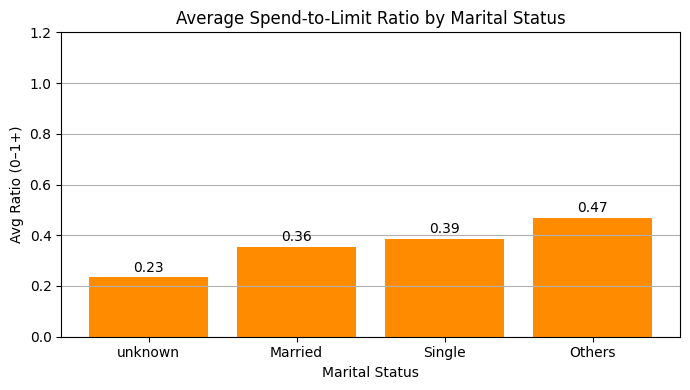

In [256]:
marriage_ratio = df_cleaned.groupby("MARRIAGE")["spend_limit_ratio"].mean()
marriage_ratio.index = marriage_ratio.index.map(lambda x: marriage_labels.get(int(x), "Unknown"))

plt.figure(figsize=(7, 4))
bars = plt.bar(marriage_ratio.index, marriage_ratio.values, color='darkorange')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", 
             ha='center', va='bottom', fontsize=10)

plt.title("Average Spend-to-Limit Ratio by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Avg Ratio (0–1+)")
plt.ylim(0, 1.2)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Married customers has higher limits and they use credit more conservatively.
##### Others have lower limits but use a higher share it may indicate credit risk.
##### Single users has lower limit than married but spend slightly more.

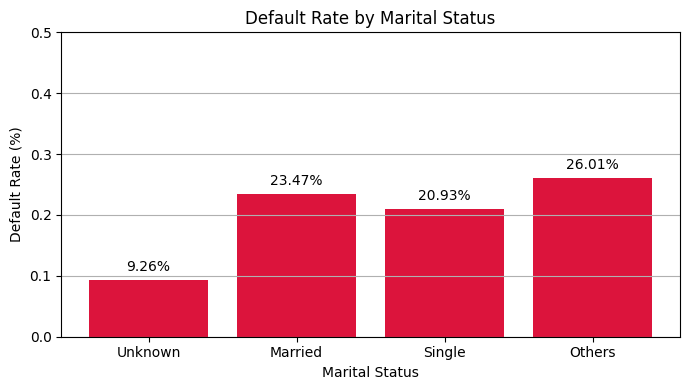

In [257]:
marriage_labels = {1: "Married", 2: "Single", 3: "Others", 0: "Unknown"}
marriage_default_rate = df_cleaned.groupby("MARRIAGE")["default payment next month"].mean()
marriage_default_rate.index = marriage_default_rate.index.map(lambda x: marriage_labels.get(int(x), "Unknown"))

plt.figure(figsize=(7, 4))
bars = plt.bar(marriage_default_rate.index, marriage_default_rate.values, color='crimson')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2%}",
             ha='center', va='bottom', fontsize=10)

plt.title("Default Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Default Rate (%)")
plt.ylim(0, 0.5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


###### Paid ratio alone isn't enough — Others group has high paid ratio but worst default rate.

###### Single customers seem to be the most balanced: good repayment + low default.

###### Married customers have slightly higher default despite similar paid ratio.

###### Unknown should be ignored or removed due to tiny sample size (just 54).



In [258]:
df_cleaned['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

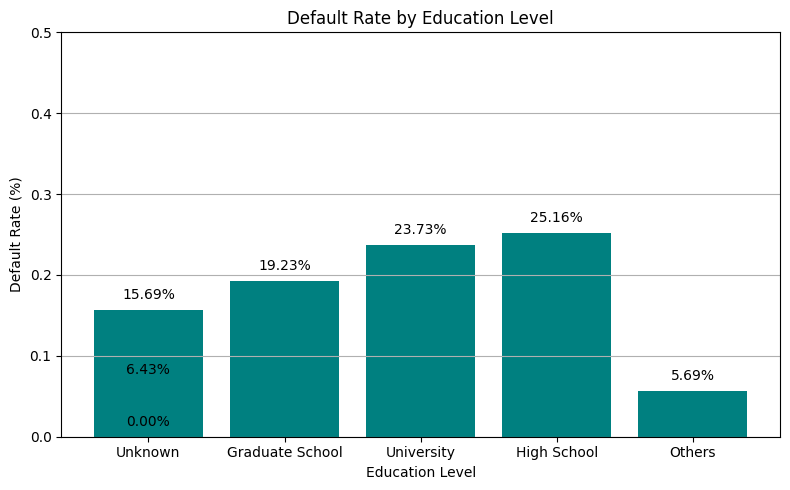

In [259]:
import matplotlib.pyplot as plt

# Mapping education
education_labels = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Others",
    5: "Unknown",
    6: "Unknown",
    0: "Unknown"
}

edu_default_rate = df_cleaned.groupby("EDUCATION")["default payment next month"].mean()
edu_default_rate.index = edu_default_rate.index.map(lambda x: education_labels.get(int(x), "Unknown"))
plt.figure(figsize=(8, 5))
bars = plt.bar(edu_default_rate.index, edu_default_rate.values, color='teal')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2%}", 
             ha='center', va='bottom', fontsize=10)

plt.title("Default Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Default Rate (%)")
plt.ylim(0, 0.5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [260]:
invalid_edu_counts = df_cleaned["EDUCATION"].value_counts().loc[[0, 4, 5, 6]]
invalid_edu_counts.sum()

468

##### 468 values has 0,4,5,6 has education which is not mentioned in description 

In [261]:
marriage_unknown = df_cleaned["MARRIAGE"] == 0
education_unknown = df_cleaned["EDUCATION"].isin([0, 4, 5, 6])
both_unknown = df_cleaned[marriage_unknown & education_unknown]
print(f"Records with both MARRIAGE in [0] and EDUCATION in [0,4,5,6]: {both_unknown.shape[0]}")


Records with both MARRIAGE in [0] and EDUCATION in [0,4,5,6]: 0


###### Higher education level → Lower default rate trend holds true.

###### High School students have the highest chance of defaulting.

###### Graduate school customers are more creditworthy on average.

###### The "Others" and "Unknown" categories might be misleading due to small sample sizes — verify their counts before drawing strong conclusions.


In [262]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20–29', '30–39', '40–49', '50–59', '60–69', '70–79']
df_cleaned['age_group'] = pd.cut(df_cleaned['AGE'], bins=bins, labels=labels, right=False)
hs_df = df_cleaned[df_cleaned["EDUCATION"] == 3]
hs_age_group_counts = hs_df['age_group'].value_counts().sort_index()
print(hs_age_group_counts)


age_group
20–29     949
30–39    1342
40–49    1596
50–59     890
60–69     128
70–79      12
Name: count, dtype: int64


##### Most high school educated customers are in the 30–49 age range

In [263]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20–29', '30–39', '40–49', '50–59', '60–69', '70–79']
df_cleaned['age_group'] = pd.cut(df_cleaned['AGE'], bins=bins, labels=labels, right=False)
age_group_counts = df_cleaned['age_group'].value_counts().sort_index()
print(age_group_counts)


age_group
20–29     9618
30–39    11238
40–49     6464
50–59     2341
60–69      314
70–79       25
Name: count, dtype: int64


###### Nearly 70% of dataset lies in the 20–39 age range

###### The 40–49 group is still sizable and useful.

###### Groups 60+ are tiny and may not be statistically reliable

##### High school–educated people make up a large portion of the 40–49 group 25%

##### In the 20–39 range, they are still present, but diluted by university/graduate education

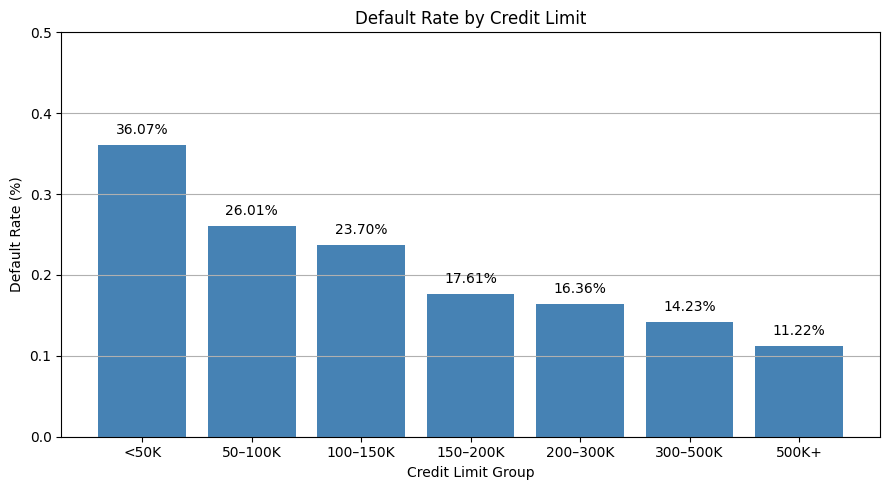

In [264]:
bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000]
labels = ['<50K', '50–100K', '100–150K', '150–200K', '200–300K', '300–500K', '500K+']
df_cleaned['limit_group'] = pd.cut(df_cleaned['LIMIT_BAL'], bins=bins, labels=labels, right=False)
limit_default_rate = df_cleaned.groupby('limit_group')["default payment next month"].mean()
plt.figure(figsize=(9, 5))
bars = plt.bar(limit_default_rate.index, limit_default_rate.values, color='steelblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2%}",
             ha='center', va='bottom', fontsize=10)

plt.title("Default Rate by Credit Limit")
plt.xlabel("Credit Limit Group")
plt.ylabel("Default Rate (%)")
plt.ylim(0, 0.5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


###### The higher the credit limit, the lower the default rate.

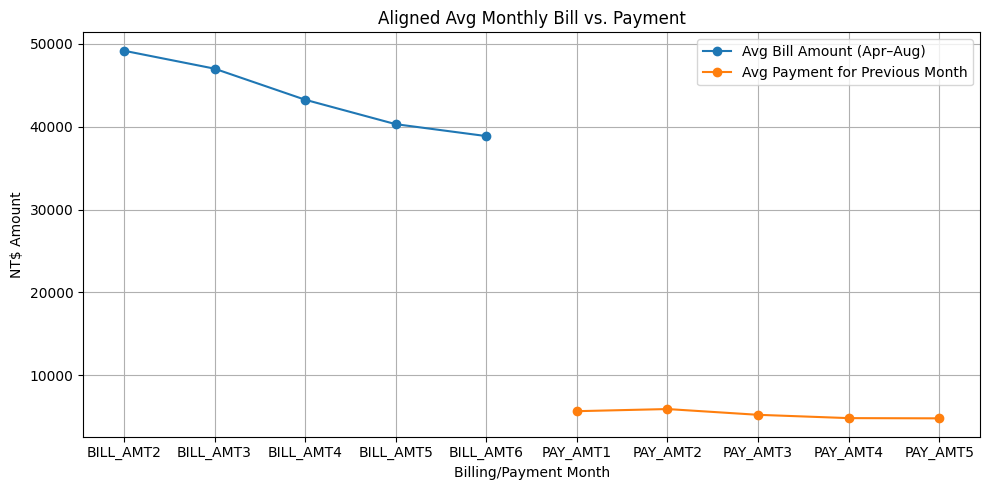

In [265]:
bill_cols = [f'BILL_AMT{i}' for i in range(2, 7)] 
pay_cols = [f'PAY_AMT{i}' for i in range(1, 6)]   
avg_bills_aligned = df_cleaned[bill_cols].mean()
avg_pays_aligned = df_cleaned[pay_cols].mean()

plt.figure(figsize=(10, 5))
plt.plot(bill_cols, avg_bills_aligned.values, marker='o', label='Avg Bill Amount (Apr–Aug)')
plt.plot(pay_cols, avg_pays_aligned.values, marker='o', label='Avg Payment for Previous Month')

plt.title("Aligned Avg Monthly Bill vs. Payment")
plt.xlabel("Billing/Payment Month")
plt.ylabel("NT$ Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###### pay_amt6 feature is not necessary since we will pay april month bill in may month 
###### Customers are paying only 10%–12% of their billed amount monthly.
###### This clearly shows underpayment is consistent.

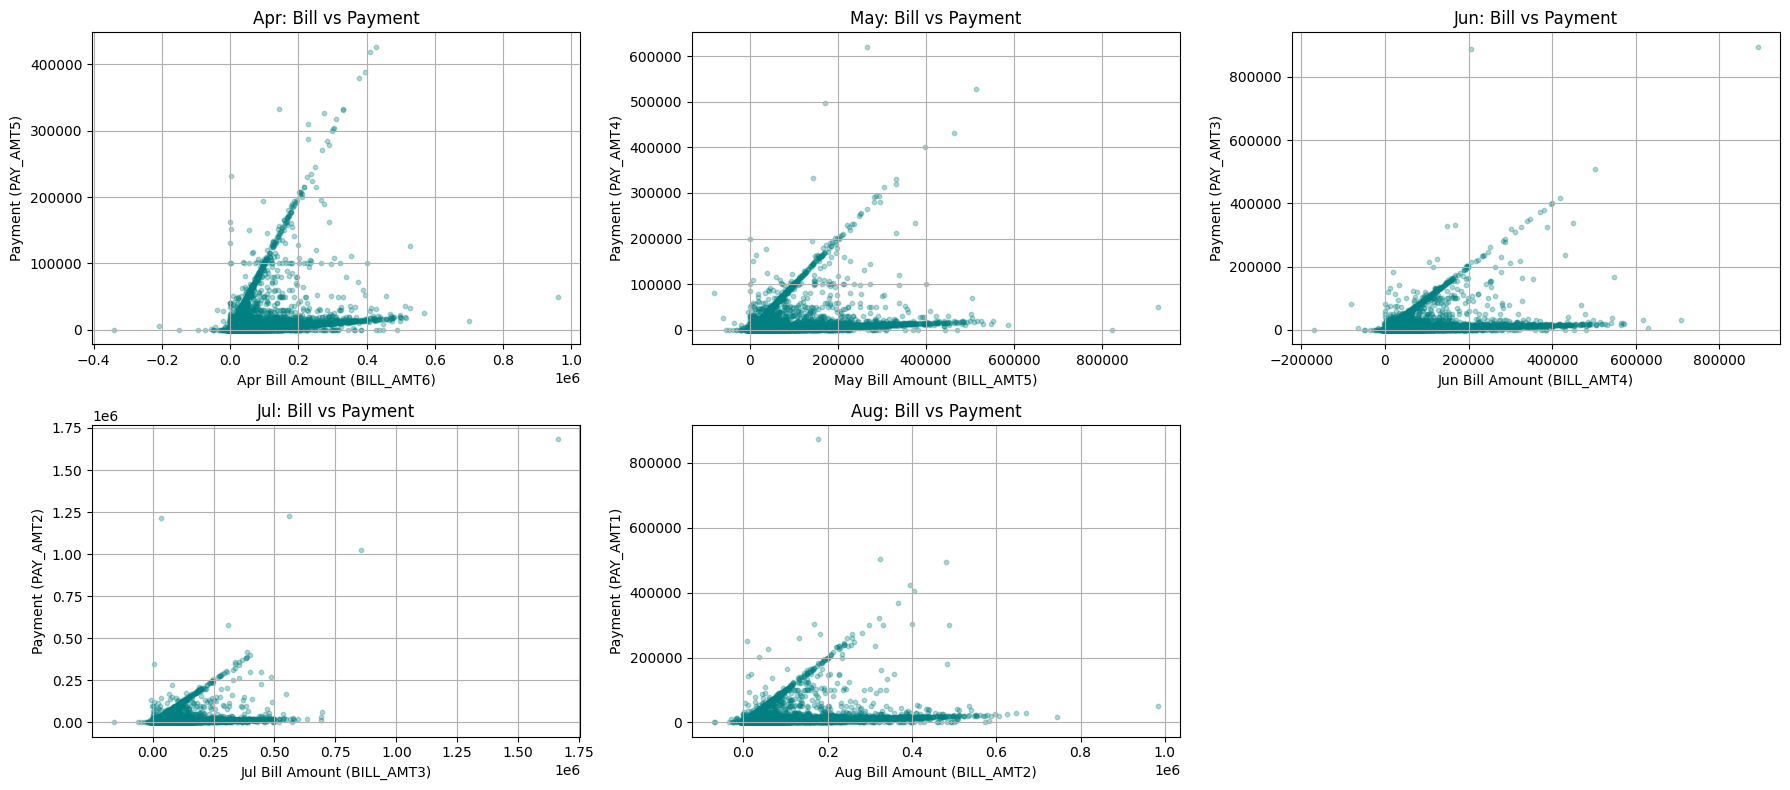

In [266]:
bill_cols = [f'BILL_AMT{i}' for i in range(6, 1, -1)]   # BILL_AMT6 to BILL_AMT2
pay_cols  = [f'PAY_AMT{i}' for i in range(5, 0, -1)]    # PAY_AMT5 to PAY_AMT1
month_labels = ['Apr', 'May', 'Jun', 'Jul', 'Aug']


plt.figure(figsize=(18, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.scatter(df_cleaned[bill_cols[i]], df_cleaned[pay_cols[i]], alpha=0.3, s=10, color='teal')
    plt.title(f'{month_labels[i]}: Bill vs Payment')
    plt.xlabel(f'{month_labels[i]} Bill Amount ({bill_cols[i]})')
    plt.ylabel(f'Payment ({pay_cols[i]})')
    plt.grid(True)

plt.tight_layout()
plt.show()


##### Most points lie far below the diagonal (y < x) which shows customers are consistently paying less than the billed amount.
##### Clear sign of partial or minimum payments across all months.
##### Clusters at the bottom shows many users are paying very little or zero, even for sizable bills.
##### Slight diagonal streaks some users do pay in full (points near y = x), but they’re a minority.

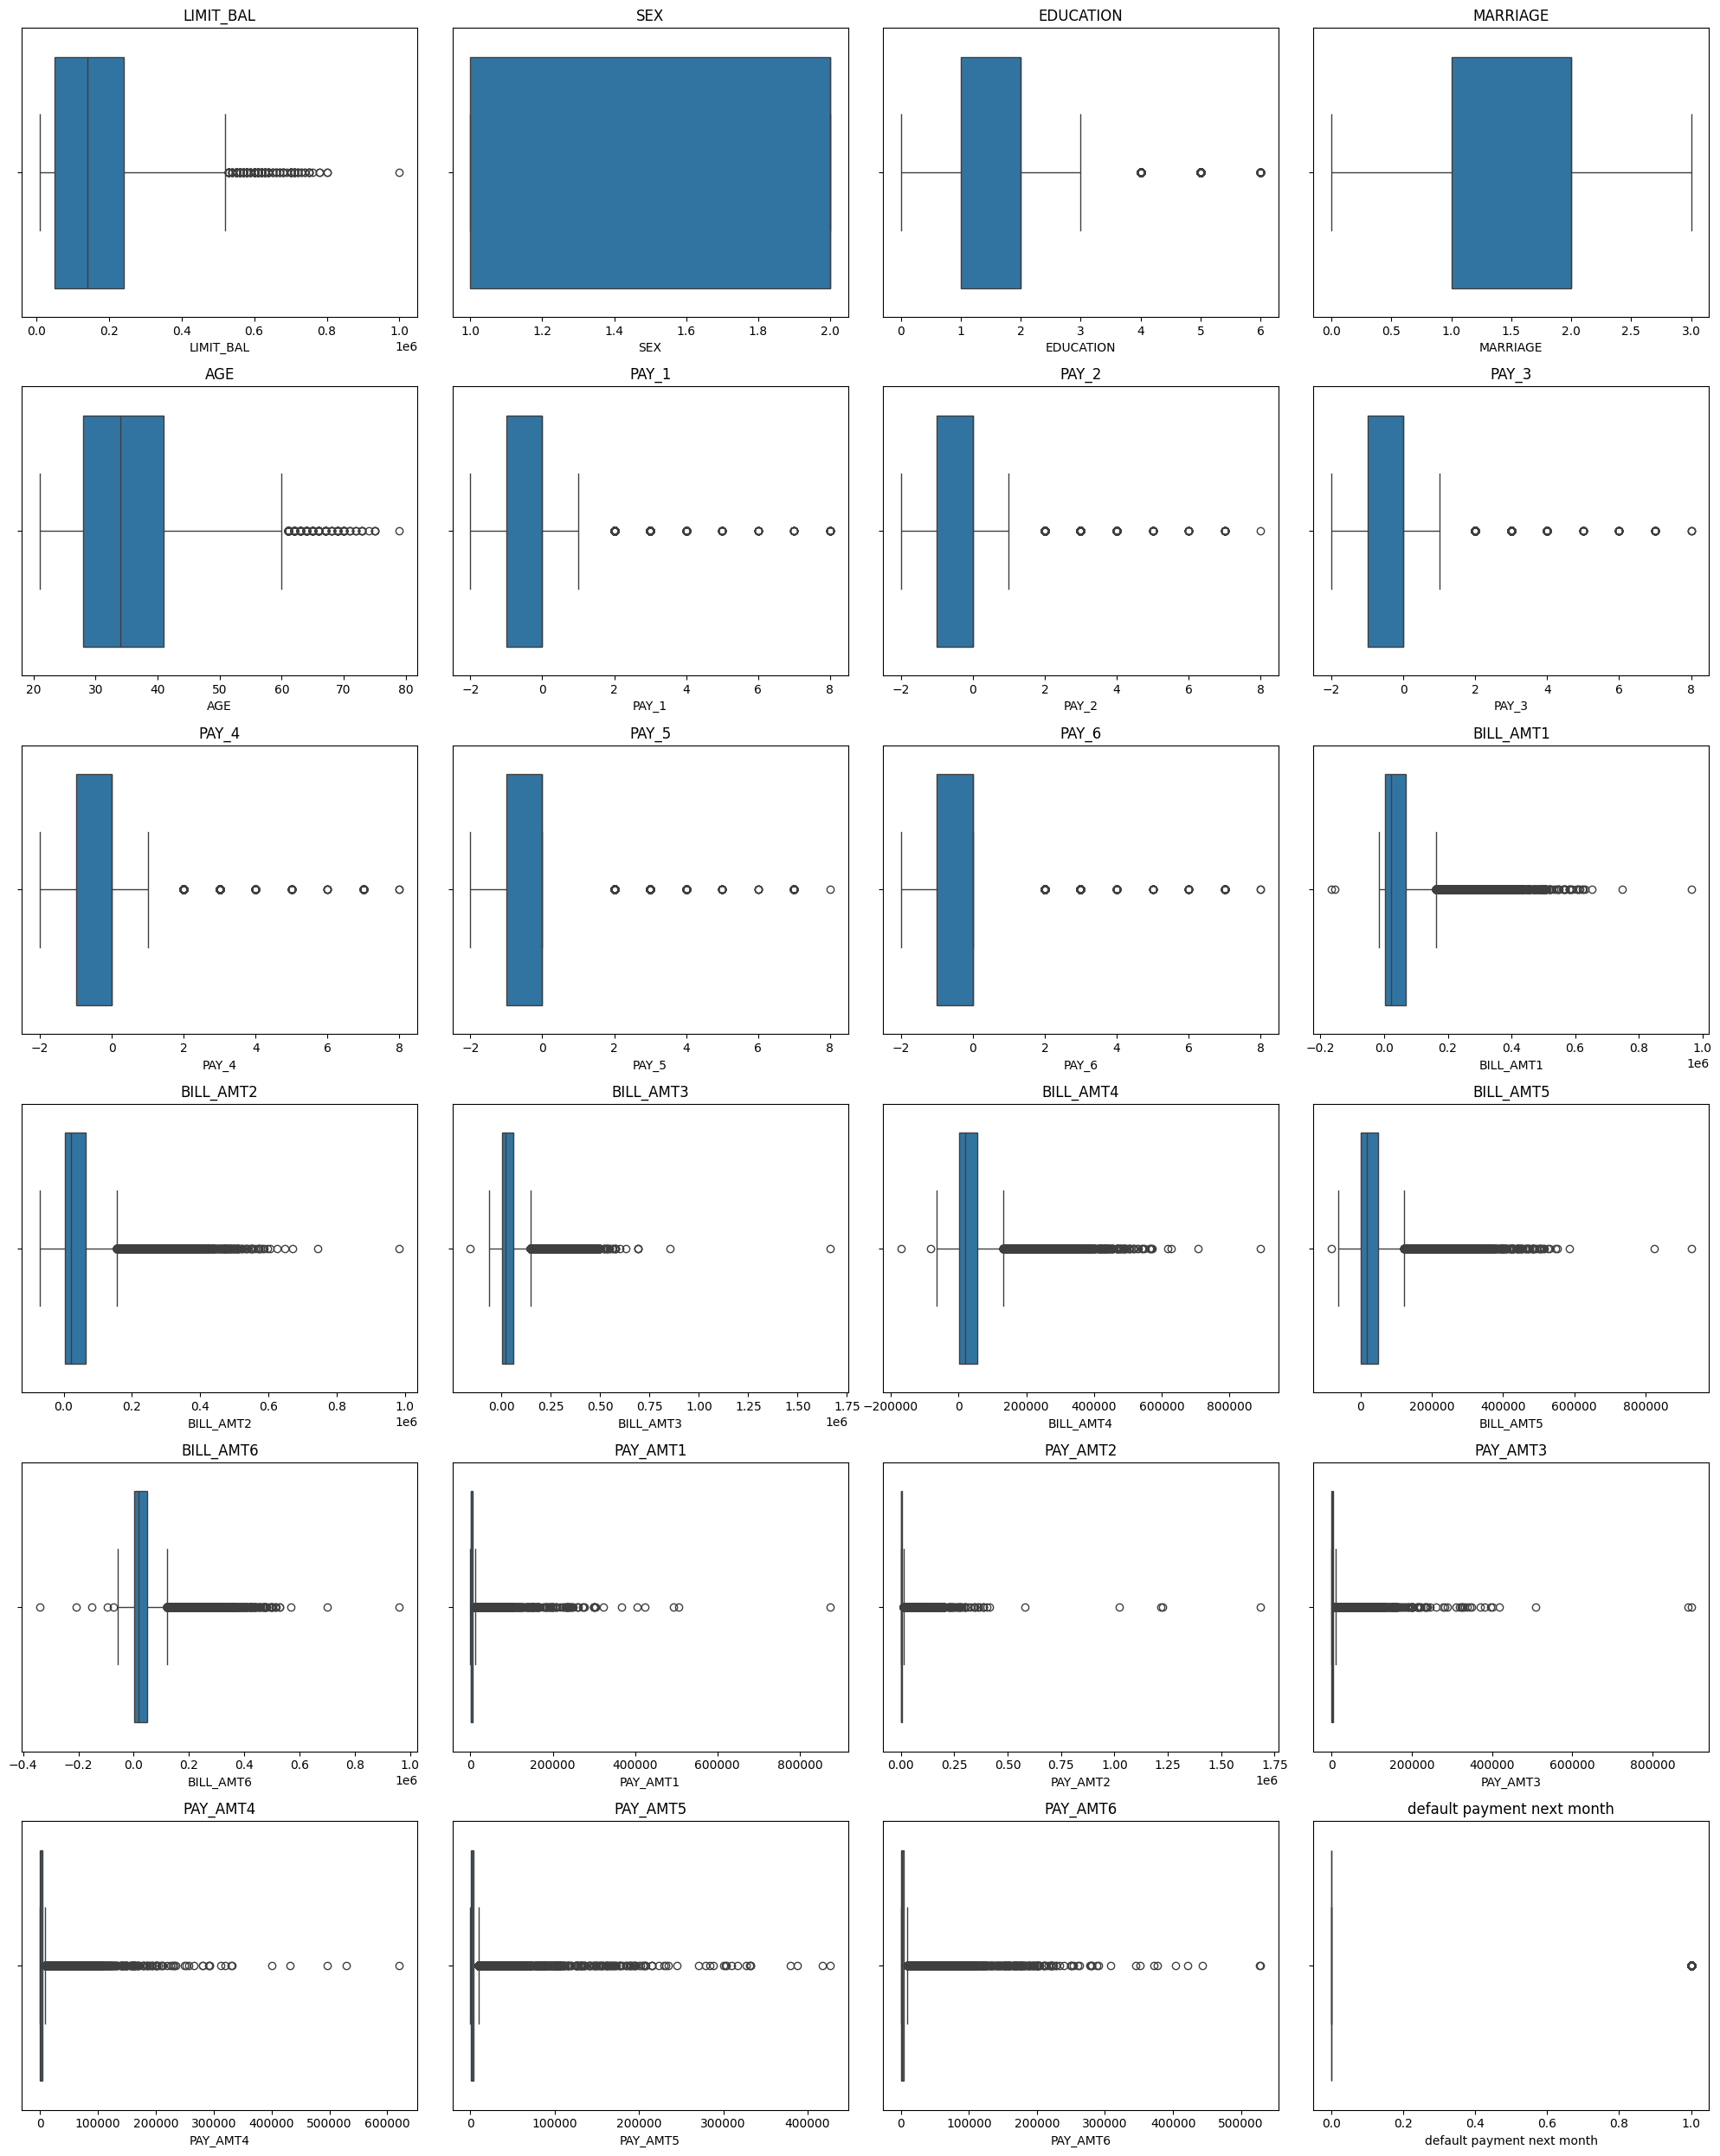

In [267]:
engineered_cols = ['paid_months', 'paid_ratio', 'total_spent', 'avg_monthly_bill', 'spend_limit_ratio']
original_numeric_cols = df_cleaned.select_dtypes(include='number').columns
original_cols = [col for col in original_numeric_cols if col not in engineered_cols]
plt.figure(figsize=(20, 25))
for i, col in enumerate(original_cols):
    plt.subplot((len(original_cols) + 3) // 4, 4, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [268]:
engineered_cols = ['paid_months', 'paid_ratio', 'total_spent', 'avg_monthly_bill', 'spend_limit_ratio']
original_cols = [col for col in df_cleaned.select_dtypes(include='number').columns if col not in engineered_cols]
outlier_counts = {}

#Apply IQR method
for col in original_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)).sum()
    outlier_counts[col] = outliers


In [269]:
import pandas as pd

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df['% of Records'] = (outlier_df['Outlier Count'] / len(df_cleaned) * 100).round(2)
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)
print(outlier_df.sort_values(by='Outlier Count', ascending=False))



                            Outlier Count  % of Records
default payment next month           6636         22.12
PAY_2                                4410         14.70
PAY_3                                4209         14.03
PAY_4                                3508         11.69
PAY_1                                3130         10.43
PAY_6                                3079         10.26
PAY_AMT4                             2994          9.98
PAY_5                                2968          9.89
PAY_AMT6                             2958          9.86
PAY_AMT5                             2945          9.82
PAY_AMT1                             2745          9.15
BILL_AMT5                            2725          9.08
PAY_AMT2                             2714          9.05
BILL_AMT6                            2693          8.98
BILL_AMT4                            2622          8.74
PAY_AMT3                             2598          8.66
BILL_AMT3                            2469       

###### SEX and MARRIAGE: No outliers (they're categorical).

###### AGE: Very few outliers so no need to treat.

###### LIMIT_BAL: Only 0.56% very few users with extremely high credit.

###### PAY_1 to PAY_6, PAY_AMT, BILL_AMT	can be Consider IQR capping to reduce skew 



In [270]:
from scipy.stats import skew
engineered_cols = [ 'age_group','AGE_BIN','limit_group']
original_cols = [col for col in df_cleaned.select_dtypes(include='number').columns if col not in engineered_cols]
skew_values = df_cleaned[original_cols].apply(skew).sort_values(ascending=False)
skew_df = pd.DataFrame(skew_values, columns=['Skewness'])
skew_df['Skew Type'] = skew_df['Skewness'].apply(
    lambda x: 'Highly Skewed' if abs(x) > 1 else ('Moderately Skewed' if abs(x) > 0.5 else 'Normal'))

print(skew_df)


                             Skewness          Skew Type
0                                                       
PAY_AMT2                    30.452295      Highly Skewed
PAY_AMT3                    17.215775      Highly Skewed
PAY_AMT1                    14.667631      Highly Skewed
PAY_AMT4                    12.904340      Highly Skewed
PAY_AMT5                    11.126861      Highly Skewed
PAY_AMT6                    10.640195      Highly Skewed
BILL_AMT3                    3.087676      Highly Skewed
BILL_AMT5                    2.876236      Highly Skewed
BILL_AMT6                    2.846502      Highly Skewed
BILL_AMT4                    2.821824      Highly Skewed
total_spent                  2.734607      Highly Skewed
avg_monthly_bill             2.734607      Highly Skewed
BILL_AMT2                    2.705086      Highly Skewed
BILL_AMT1                    2.663728      Highly Skewed
default payment next month   1.343437      Highly Skewed
PAY_5                        1.

##### very Highly Skewed PAY_AMT1 to PAY_AMT6 skewed due to many zeros and a few massive payments

##### Highly Skewed BILL_AMT1 to BILL_AMT6 — positive heavy tail due to huge bills

##### default payment next month skewed since only ~22% default
##### avg_monthly_bill, total_spent: same reason as above
##### paid_months: skewed left (likely many paid fully → 6 months)
##### Moderately Skewed (0.5–1) LIMIT_BAL, AGE, PAY_X, EDUCATION — may benefit from mild transformation.
##### Normally Distributed: SEX, MARRIAGE — categorical, no transformation needed

In [271]:
df_cleaned

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,paid_months,paid_ratio,age_group,total_spent,avg_monthly_bill,spend_limit_ratio,AGE_BIN,limit_group
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,4,0.666667,20–29,7704,1284.000000,0.064200,21-30,<50K
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,4,0.666667,20–29,17077,2846.166667,0.023718,21-30,100–150K
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,6,1.000000,30–39,101653,16942.166667,0.188246,31-40,50–100K
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,6,1.000000,30–39,231334,38555.666667,0.771113,31-40,50–100K
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,6,1.000000,50–59,109339,18223.166667,0.364463,51-60,50–100K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,6,1.000000,30–39,725349,120891.500000,0.549507,31-40,200–300K
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,6,1.000000,40–49,21182,3530.333333,0.023536,41-50,150–200K
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,3,0.500000,30–39,70496,11749.333333,0.391644,31-40,<50K
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,5,0.833333,40–49,266611,44435.166667,0.555440,41-50,50–100K


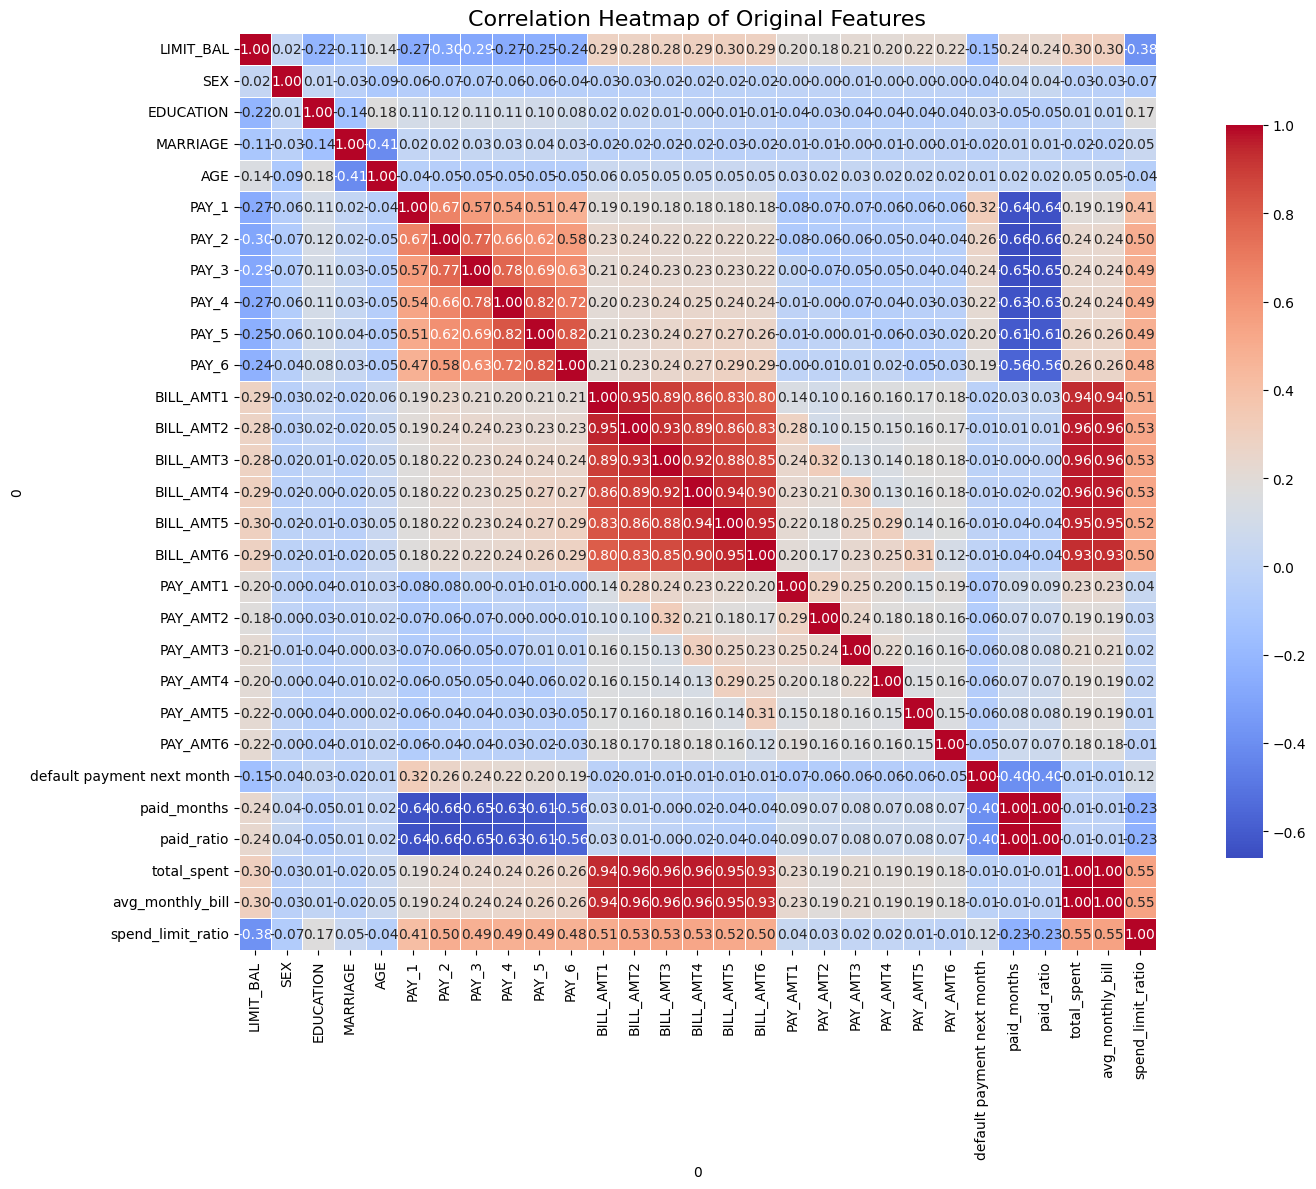

In [272]:
engineered_cols = [ 'age_group','AGE_BIN','limit_group']
corr_df = df_cleaned.drop(columns=engineered_cols, errors='ignore')
corr_matrix = corr_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Original Features", fontsize=16)
plt.tight_layout()
plt.show()


###### PAY_1–PAY_6	Strongly predictive – keep all
###### BILL_AMT1–6	Are Highly Correlated Among Themselves.
###### PAY_AMT1–6	Weak alone – keep for interaction or total payment
###### LIMIT_BAL	Slight signal – keep it
###### Demographics	Minimal impact – keep for completeness, not predictive value
###### paid_months & paid_ratio	1.00 Almost perfectly correlated (expected since ratio = months/6).
###### total_spent & avg_monthly_bill	0.96	Strong correlation.
###### avg_monthly_bill & spend_limit_ratio	0.95	Strong correlation.

### Target Behavior

The target variable captures **default payment next month**:
- `1` = default (payment not made)
- `0` = no default (payment made)

#### Class Imbalance:
- ~**22%** of clients default
- ~**78%** pay on time

---

###  Repayment History Is the Strongest Indicator

Repayment status (**PAY_1 to PAY_6**) is the **most predictive** of default.

#### Meaning of PAY values:
- `-2`: No bill generated
- `-1`: Paid before due date
- `0`: Paid on time
- `1–8`: Number of months delayed

Customers with higher delays in recent months are far more likely to default.

---

### Age Group Analysis

- Most clients are aged **20–39**
- **30–49** age group is the most reliable:
  - Lower default rates
  - Better repayment ratios
- **20–29** show inconsistent repayment and higher credit utilization
- **70–79** appear highly reliable — but group size is too small to generalize

---

### Credit Limit Behavior

- Most clients have limits **below 200K NT$**
- Clients with **higher credit limits** tend to default less
- **30–49** year-olds use only ~**33–36%** of their credit limit
- **20–29** and **70–79** customers exceed **40% usage**, likely due to:
  - **Young**: Lower limits
  - **Old**: Higher credit dependency

---

### Marital Status Insights

- `0` = Unknown → Appears only in **54 records** → Safe to **remove or ignore**
- **Married** clients: Higher limits, more conservative credit usage
- **Single** clients: Balanced repayment, slightly lower limits, low default rate
- **Others** group:
  - Highest **spend-to-limit ratio**
  - Highest **default rate**, despite decent repayment — signals potential credit risk

---

### Education Level and Default Rate

- Education values `0`, `4`, `5`, `6` are **undefined** → 468 such records exist
- **Graduate School**: Most creditworthy
- **High School**: Highest default rate
- High-school-educated clients are common in **40–49** group, yet default more

---

### Billing vs Payment Trends

- Customers consistently pay only **10–12%** of billed amount
- Most points lie **below the diagonal** in bill vs payment plots:
  - Indicates **partial/minimum payments** are the norm
- Some users pay in full (on `y = x` line), but they are rare

---

### Feature Quality & Transformation Needs

#### No treatment needed:
- `SEX`, `MARRIAGE`: Categorical, **no outliers or skew**
- `AGE`: Few outliers, but **can be retained as-is**
- `LIMIT_BAL`: Only **0.56%** are extreme outliers
- `PAY_X, AGE, spend_limit_ratio` : moderately skewed

#### Transformation recommended (for non-tree models):
- `PAY_AMT1–6`, `BILL_AMT1–6`, `total_spent`,`avg_monthly_bill`,`paid_months`:
  - **Highly skewed**.
  - Apply **log transformation** or **IQR capping** for non tree models

#### Skew Handling:
- **Tree-based models**: No need to transform skewed features
- **Non-Tree-based model**: Prefer scaling and skew handling

---

### Feature Redundancy & Multicollinearity

- `PAY_1–PAY_6`:	Strongly predictive.
- `BILL_AMT1–6`: Highly correlated — consider **reducing or aggregating**
- `PAY_AMT1–6`: Weak correlation with default, but useful in **interactions or totals**
- `LIMIT_BAL`: Slight predictive signal.
- `Demographics`: Minimal predictive value, but retain for completeness
- `PAY_AMT1–6`: Weak alone – keep for interaction or total payment
- `paid_months & paid_ratio`: 1.00 Almost perfectly correlated.
- `total_spent & avg_monthly_bill`:	0.96	Strong correlation.
- `avg_monthly_bill & spend_limit_ratio`:	0.95	Strong correlation.
---

### Miscellaneous Notes

- `PAY_AMT6`: Can be **excluded** — reflects payment for **April bill**, not relevant for October default
- Partial repayment is a **consistent pattern** across the dataset

---

### Final Summary

- **Repayment history (PAY_1–PAY_6)** is the strongest signal of default
- Consider supporting features:
  - Age group
  - Limit usage ratio
  - Education level
- Handle skew and outliers for linear models
- Drop or reclassify small or undefined groups in categorical variables
- Tree-based models handle raw features well.
- Consider Recursive Feature Elimination (RFE) or feature importance from tree models to reduce dimensionality before final modeling


In [273]:
drop_cols =  ['paid_ratio', 'age_group', 'AGE_BIN', 'limit_group', 'PAY_AMT6']
df_input = df_cleaned.drop(columns=drop_cols)
#Save for modeling
df_input.to_csv('credit_data_model_ready.csv', index=False)